In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os

In [32]:
df = pd.read_csv("data/main.csv", header=1)

n=1000
N=10
DF=[]
for i in range(N):
    DF.append(df.iloc[(n+2)*i:(n+2)*i + n][:])

# plt.figure()
# for i in range(20):
#     sns.scatterplot(data=pd.read_csv(f"data_res/{i}.csv")[9800:9900:1], x='i', y='x', alpha=1, s=50)


# df
DF[2]

,time,x,y,z,x_,y_,z_
2004,0,0.282778,0.0798994,0.606072,-0.0577071,0.0124491,-0.0652673
2005,0.1,0.277456,0.0855103,0.604191,-0.0480815,0.10821,0.0371713
2006,0.2,0.273633,0.108847,0.621821,-0.0231672,0.46667,0.441143
2007,0.3,0.268737,0.0913237,0.590504,-0.0548462,-0.149943,-0.272887
2008,0.4,0.263011,0.0795904,0.567618,-0.0591924,-0.10015,-0.204606
...,...,...,...,...,...,...,...
2999,99.5,0.683906,0.62686,0.138085,4.3e+15,1.64012e+16,-8.3236e+14
3000,99.6,0.778164,0.792407,0.821069,4.3e+15,1.64012e+16,-8.3236e+14
3001,99.7,0.202949,0.320219,0.968549,4.3e+15,1.64012e+16,-8.3236e+14
3002,99.8,0.76791,0.242094,0.143579,4.3e+15,1.64012e+16,-8.3236e+14


In [37]:

def printt(x):
    plt.figure()
    for i in range(N):
        DF[i]["time"] = DF[i]["time"].apply(float)
        DF[i][x] = DF[i][x].apply(float)
        sns.scatterplot(data=DF[i][::1], x="time", y=x)



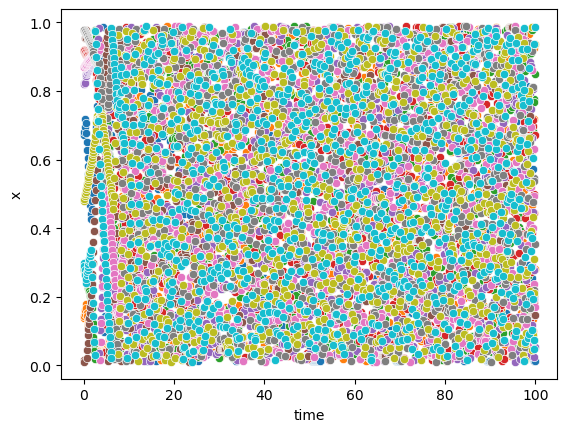

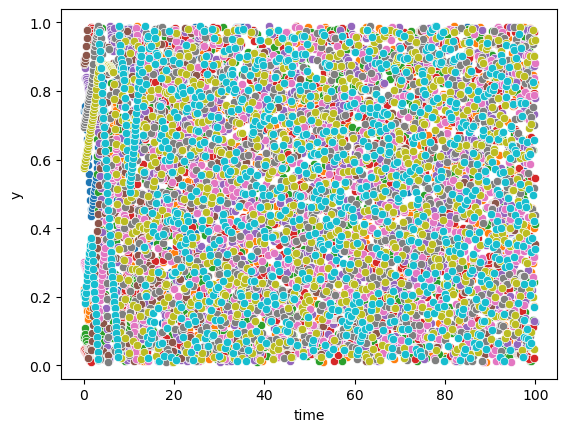

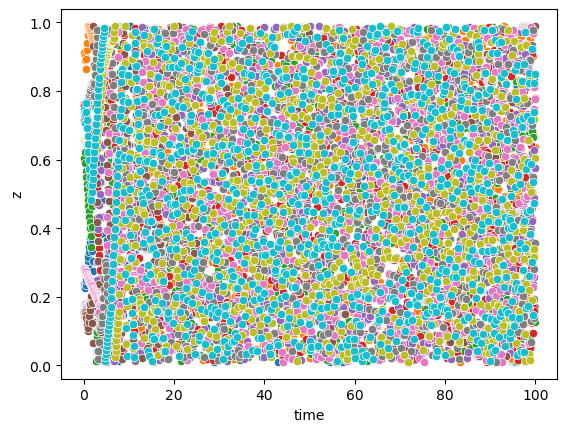

In [38]:
printt("x")
printt("y")
printt("z")

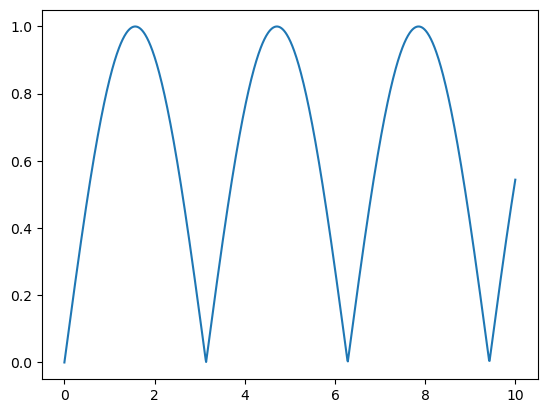

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os
p = np.linspace(0, 10, 1000)
a = np.cos(p)
b = np.arccos(a)
c = np.sin(b)


plt.figure()
plt.plot(p, c)



Вычисленные значения синуса (через производную):
[ 0.03172261  0.06338135  0.12650748  0.18912422  0.25097942  0.31182401
  0.371413    0.42950643  0.4858704   0.54027794  0.59250997  0.64235617
  0.68961583  0.73409865  0.77562552  0.81402921  0.8491551   0.88086173
  0.90902145  0.93352086  0.95426131  0.97115929  0.98414675  0.9931714
  0.9981969   0.99920301  0.99618569  0.98915708  0.97814548  0.96319523
  0.94436654  0.92173521  0.89539239  0.86544413  0.83201104  0.79522773
  0.75524232  0.71221581  0.66632147  0.61774408  0.56667925  0.51333261
  0.45791896  0.40066143  0.34179058  0.28154346  0.22016266  0.15789535
  0.09499224  0.03170664 -0.03170664 -0.09499224 -0.15789535 -0.22016266
 -0.28154346 -0.34179058 -0.40066143 -0.45791896 -0.51333261 -0.56667925
 -0.61774408 -0.66632147 -0.71221581 -0.75524232 -0.79522773 -0.83201104
 -0.86544413 -0.89539239 -0.92173521 -0.94436654 -0.96319523 -0.97814548
 -0.98915708 -0.99618569 -0.99920301 -0.9981969  -0.9931714  -0.98414675
 -0

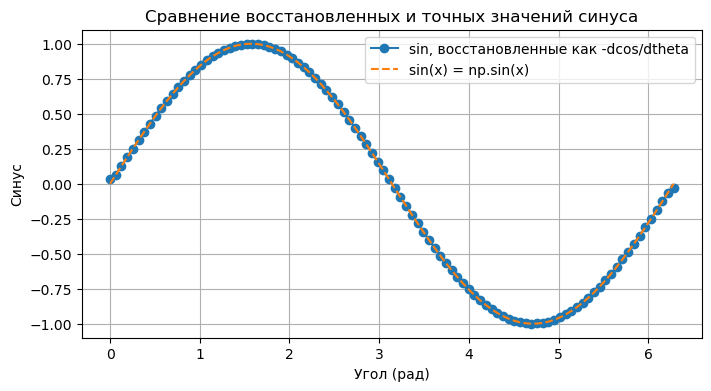

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



dcos_dtheta = np.gradient(cos_array, theta)

sin_array = -dcos_dtheta

# Визуализация для проверки
plt.figure(figsize=(8, 4))
plt.plot(theta, sin_array, 'o-', label='sin, восстановленные как -dcos/dtheta')
plt.plot(theta, sin_exact, '--', label='sin(x) = np.sin(x)')
plt.xlabel('Угол (рад)')
plt.ylabel('Синус')
plt.legend()
plt.title('Сравнение восстановленных и точных значений синуса')
plt.grid(True)
plt.show()